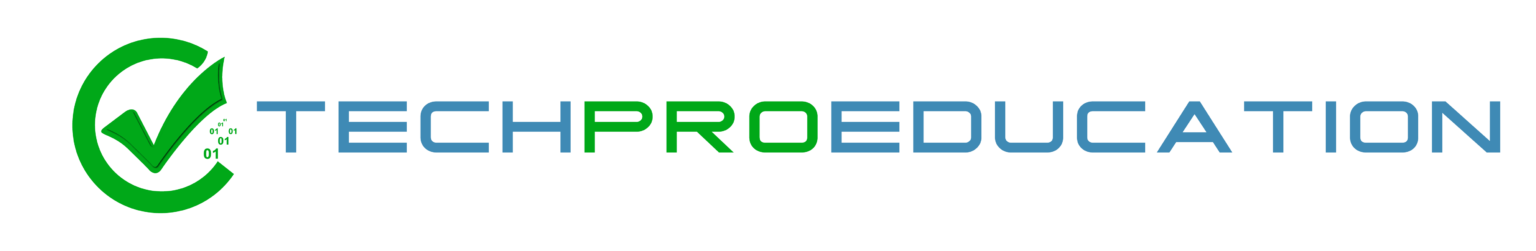

# WELCOME!

**Overview**

The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

**The training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

**The test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

**Data Dictionary**

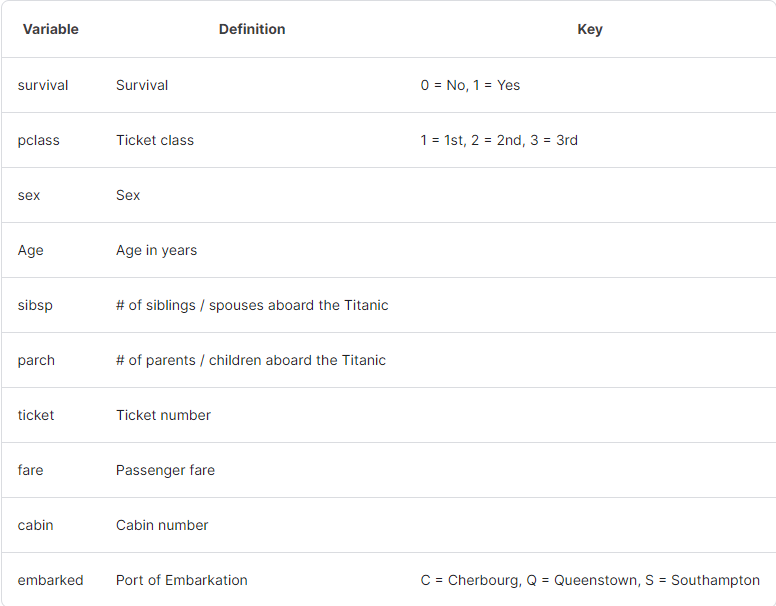

**Variable Notes**

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

# Import Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (5,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from yellowbrick.classifier import ROCAUC

from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Exploratory Data Analysis and Visualization

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
df_train.shape

(891, 12)

In [8]:
df_train.duplicated().sum()

0

In [9]:
df_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

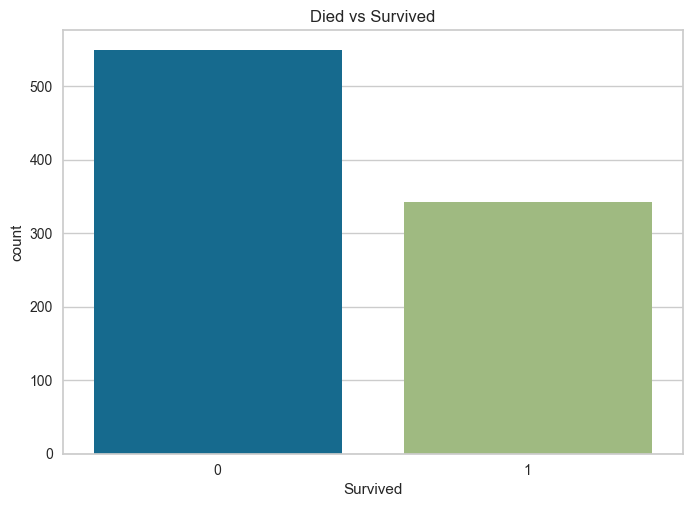

In [10]:
sns.countplot(df_train['Survived'])
plt.title("Died vs Survived");

In [11]:
df_train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

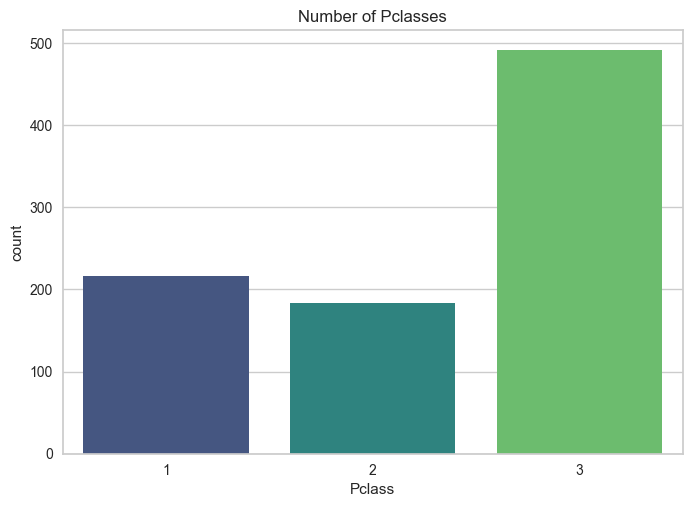

In [12]:
sns.countplot(df_train.Pclass, palette = "viridis")
plt.title("Number of Pclasses")
plt.show()

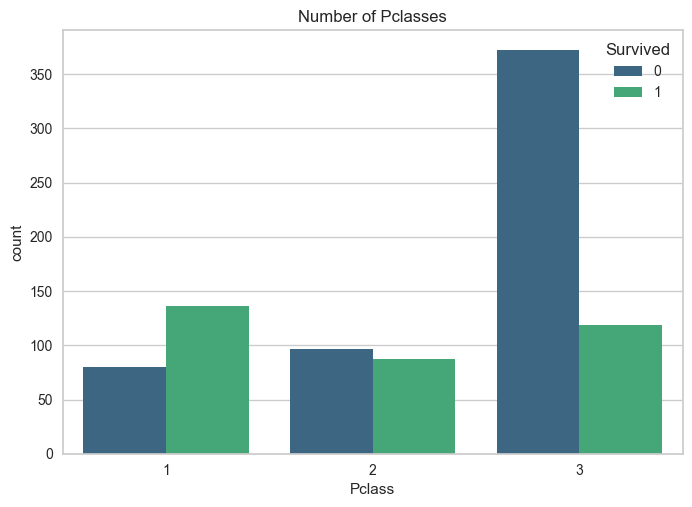

In [13]:
sns.countplot(df_train.Pclass, hue = df_train.Survived, palette = "viridis")
plt.title("Number of Pclasses")
plt.show()

In [14]:
df_train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

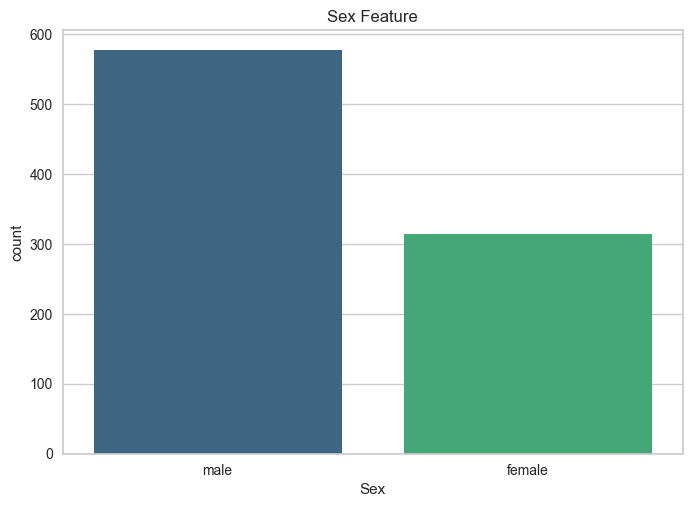

In [15]:
sns.countplot(df_train.Sex, palette = "viridis")
plt.title("Sex Feature")
plt.show()

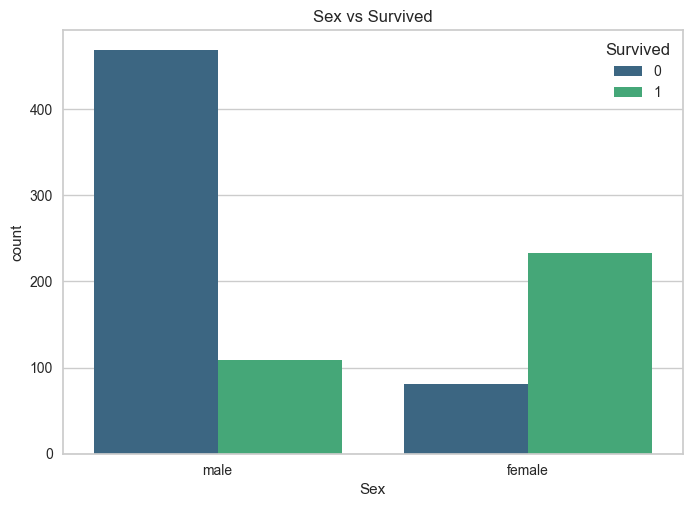

In [16]:
sns.countplot(df_train.Sex, hue = df_train.Survived, palette = "viridis")
plt.title("Sex vs Survived")
plt.show()

# Data Preprocessing

In [17]:
train_len = len(df_train)
# combine two dataframes
df = pd.concat([df_train, df_test], axis=0)
df = df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [19]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [20]:
df = df.drop(columns=['Cabin'], axis=1)

In [21]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [22]:
df['Embarked'].mode()[0]

'S'

In [23]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

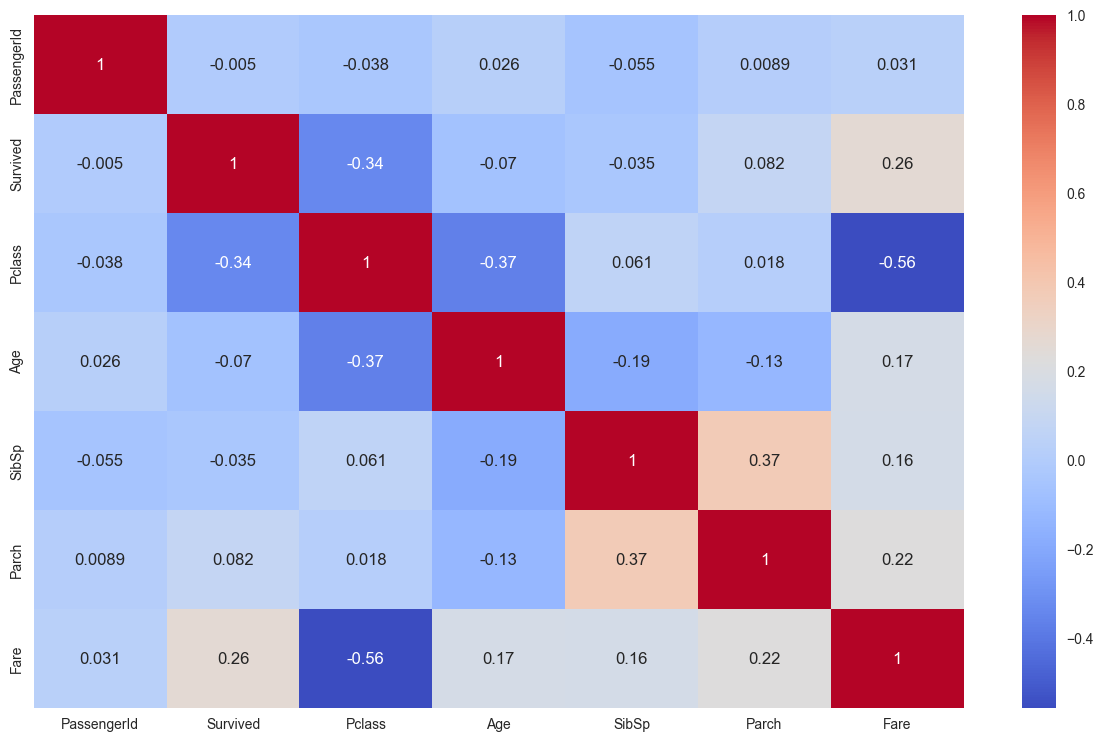

In [24]:
corr = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm');

In [25]:
df = df.drop(columns=['Name', 'Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,S
1,2,1.0,1,female,38.0,1,0,71.2833,C
2,3,1.0,3,female,26.0,0,0,7.9250,S
3,4,1.0,1,female,35.0,1,0,53.1000,S
4,5,0.0,3,male,35.0,0,0,8.0500,S


# Feature Engineering

In [26]:
df_new = df.copy()

# 'SibSp' ve 'Parch' sütunlarını toplayarak 'FamilySize' sütununu oluştur
df_new['FamilySize'] = df_new['SibSp'] + df_new['Parch'] + 1

df_new.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0.0,3,male,22.0,1,0,7.2500,S,2
1,2,1.0,1,female,38.0,1,0,71.2833,C,2
2,3,1.0,3,female,26.0,0,0,7.9250,S,1
3,4,1.0,1,female,35.0,1,0,53.1000,S,2
4,5,0.0,3,male,35.0,0,0,8.0500,S,1


In [27]:
def categorize_age(age):
    if age < 18:
        return 0 #'Çocuk'
    elif age < 30:
        return 1 #'Genç'
    elif age < 60:
        return 2 #'Yetişkin'
    else:
        return 3 #'Yaşlı'

# 'Age' sütununu kullanarak 'Age Category' adında yeni bir sütun oluştur
df_new['AgeCategory'] = df_new['Age'].apply(categorize_age)

df_new.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,AgeCategory
0,1,0.0,3,male,22.0,1,0,7.2500,S,2,1
1,2,1.0,1,female,38.0,1,0,71.2833,C,2,2
2,3,1.0,3,female,26.0,0,0,7.9250,S,1,1
3,4,1.0,1,female,35.0,1,0,53.1000,S,2,2
4,5,0.0,3,male,35.0,0,0,8.0500,S,1,2


In [28]:
def calculate_fare_per_person(fare, family_size):
    return fare / (family_size + 1)

# 'Fare' ve 'Family Size' sütunlarını kullanarak 'Fare per Person' adında yeni bir sütun oluştur
df_new['FarePerPerson'] = df_new.apply(lambda row: calculate_fare_per_person(row['Fare'], row['SibSp'] + row['Parch']), axis=1)

# Sonuçları kontrol et
df_new.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,AgeCategory,FarePerPerson
0,1,0.0,3,male,22.0,1,0,7.2500,S,2,1,3.62500
1,2,1.0,1,female,38.0,1,0,71.2833,C,2,2,35.64165
2,3,1.0,3,female,26.0,0,0,7.9250,S,1,1,7.92500
3,4,1.0,1,female,35.0,1,0,53.1000,S,2,2,26.55000
4,5,0.0,3,male,35.0,0,0,8.0500,S,1,2,8.05000


In [29]:
def encode_sex(sex):
    if sex == 'male':
        return 0
    elif sex == 'female':
        return 1

df_new['Sex'] = df_new['Sex'].apply(encode_sex)

df_new.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,AgeCategory,FarePerPerson
0,1,0.0,3,0,22.0,1,0,7.2500,S,2,1,3.62500
1,2,1.0,1,1,38.0,1,0,71.2833,C,2,2,35.64165
2,3,1.0,3,1,26.0,0,0,7.9250,S,1,1,7.92500
3,4,1.0,1,1,35.0,1,0,53.1000,S,2,2,26.55000
4,5,0.0,3,0,35.0,0,0,8.0500,S,1,2,8.05000


In [30]:
from sklearn.preprocessing import LabelEncoder
cols = ['Embarked']
le = LabelEncoder()

for col in cols:
    df_new[col] = le.fit_transform(df[col])
df_new.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,AgeCategory,FarePerPerson
0,1,0.0,3,0,22.0,1,0,7.2500,2,2,1,3.62500
1,2,1.0,1,1,38.0,1,0,71.2833,0,2,2,35.64165
2,3,1.0,3,1,26.0,0,0,7.9250,2,1,1,7.92500
3,4,1.0,1,1,35.0,1,0,53.1000,2,2,2,26.55000
4,5,0.0,3,0,35.0,0,0,8.0500,2,1,2,8.05000


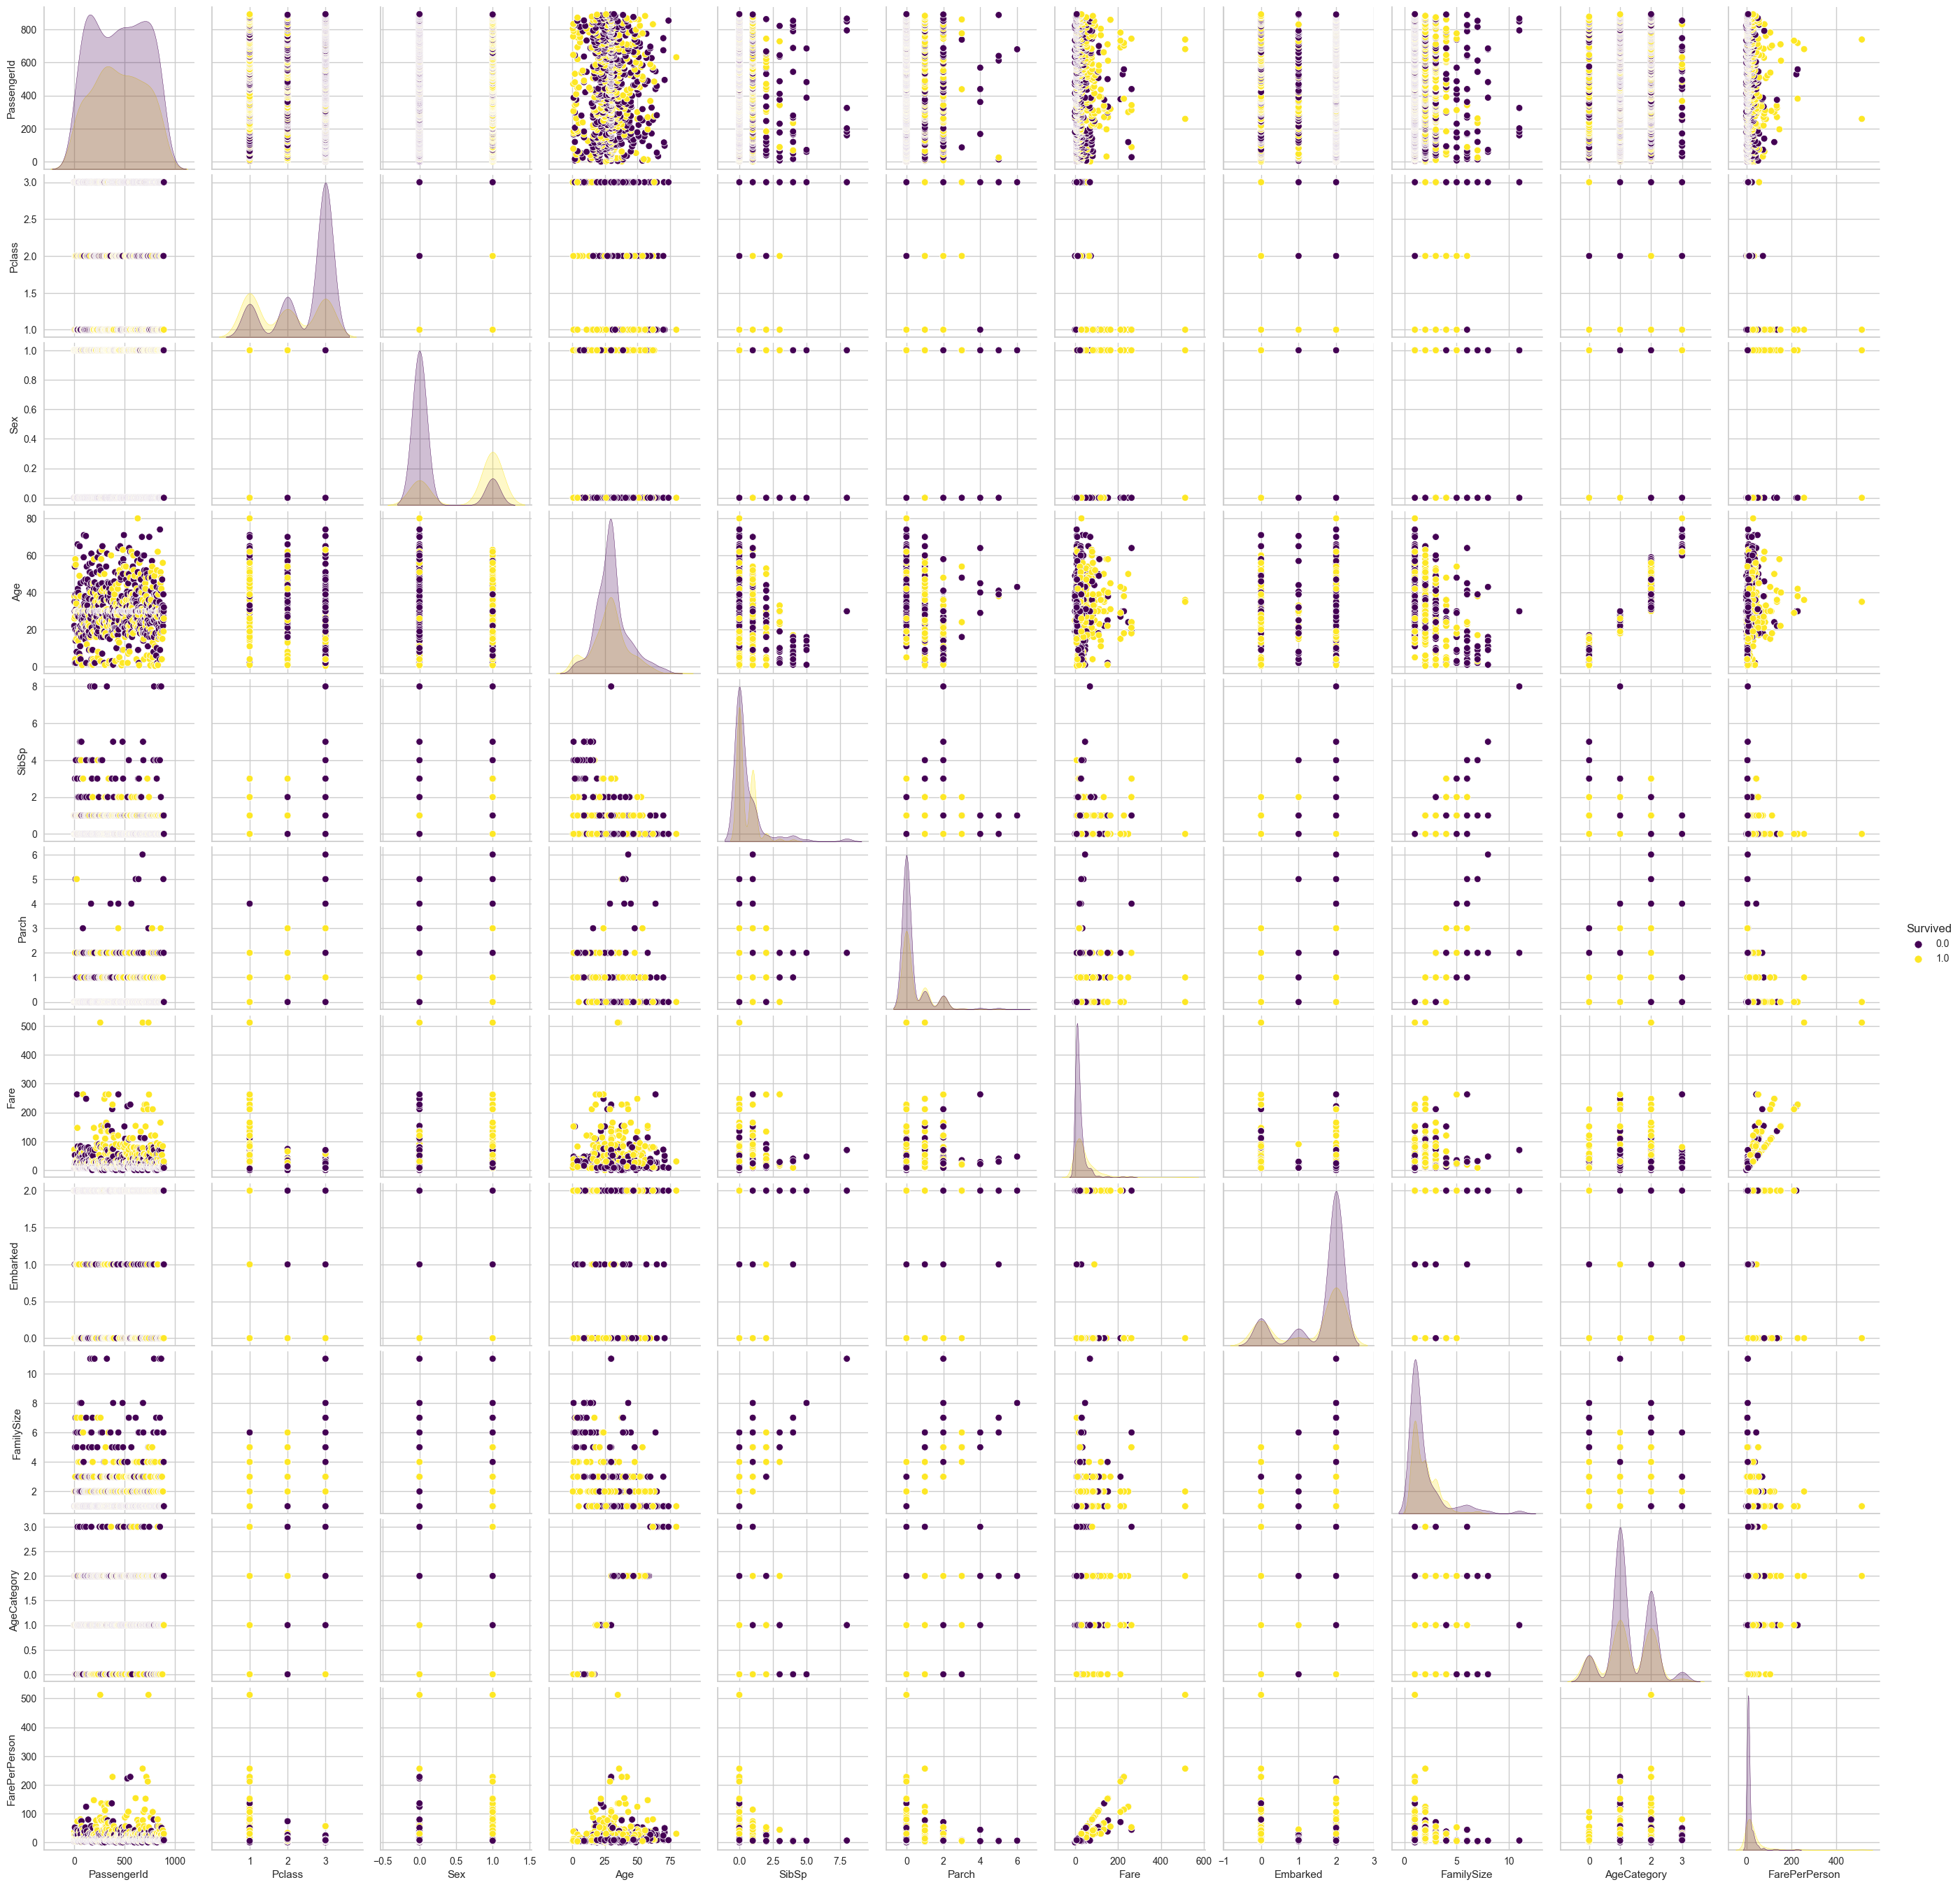

In [31]:
sns.pairplot(df_new, hue='Survived', palette="viridis");

# Train | Test Split

In [32]:
df_train = df_new.iloc[:train_len, :]
df_test = df_new.iloc[train_len:, :]

In [33]:
X = df_train.drop(columns=['PassengerId', 'Survived'], axis=1)
y = df_train['Survived']

In [34]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,AgeCategory,FarePerPerson
0,3,0,22.0,1,0,7.2500,2,2,1,3.62500
1,1,1,38.0,1,0,71.2833,0,2,2,35.64165
2,3,1,26.0,0,0,7.9250,2,1,1,7.92500
3,1,1,35.0,1,0,53.1000,2,2,2,26.55000
4,3,0,35.0,0,0,8.0500,2,1,2,8.05000


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# AdaBoosting Classifier

In [36]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [37]:
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)

In [38]:
ada_model.fit(X, y)

AdaBoostClassifier(random_state=42)

In [39]:
eval_metric(ada_model, X_train, y_train, X_test, y_test)

Test_Set
[[138  19]
 [ 25  86]]
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       157
         1.0       0.82      0.77      0.80       111

    accuracy                           0.84       268
   macro avg       0.83      0.83      0.83       268
weighted avg       0.84      0.84      0.84       268


Train_Set
[[341  51]
 [ 54 177]]
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87       392
         1.0       0.78      0.77      0.77       231

    accuracy                           0.83       623
   macro avg       0.82      0.82      0.82       623
weighted avg       0.83      0.83      0.83       623



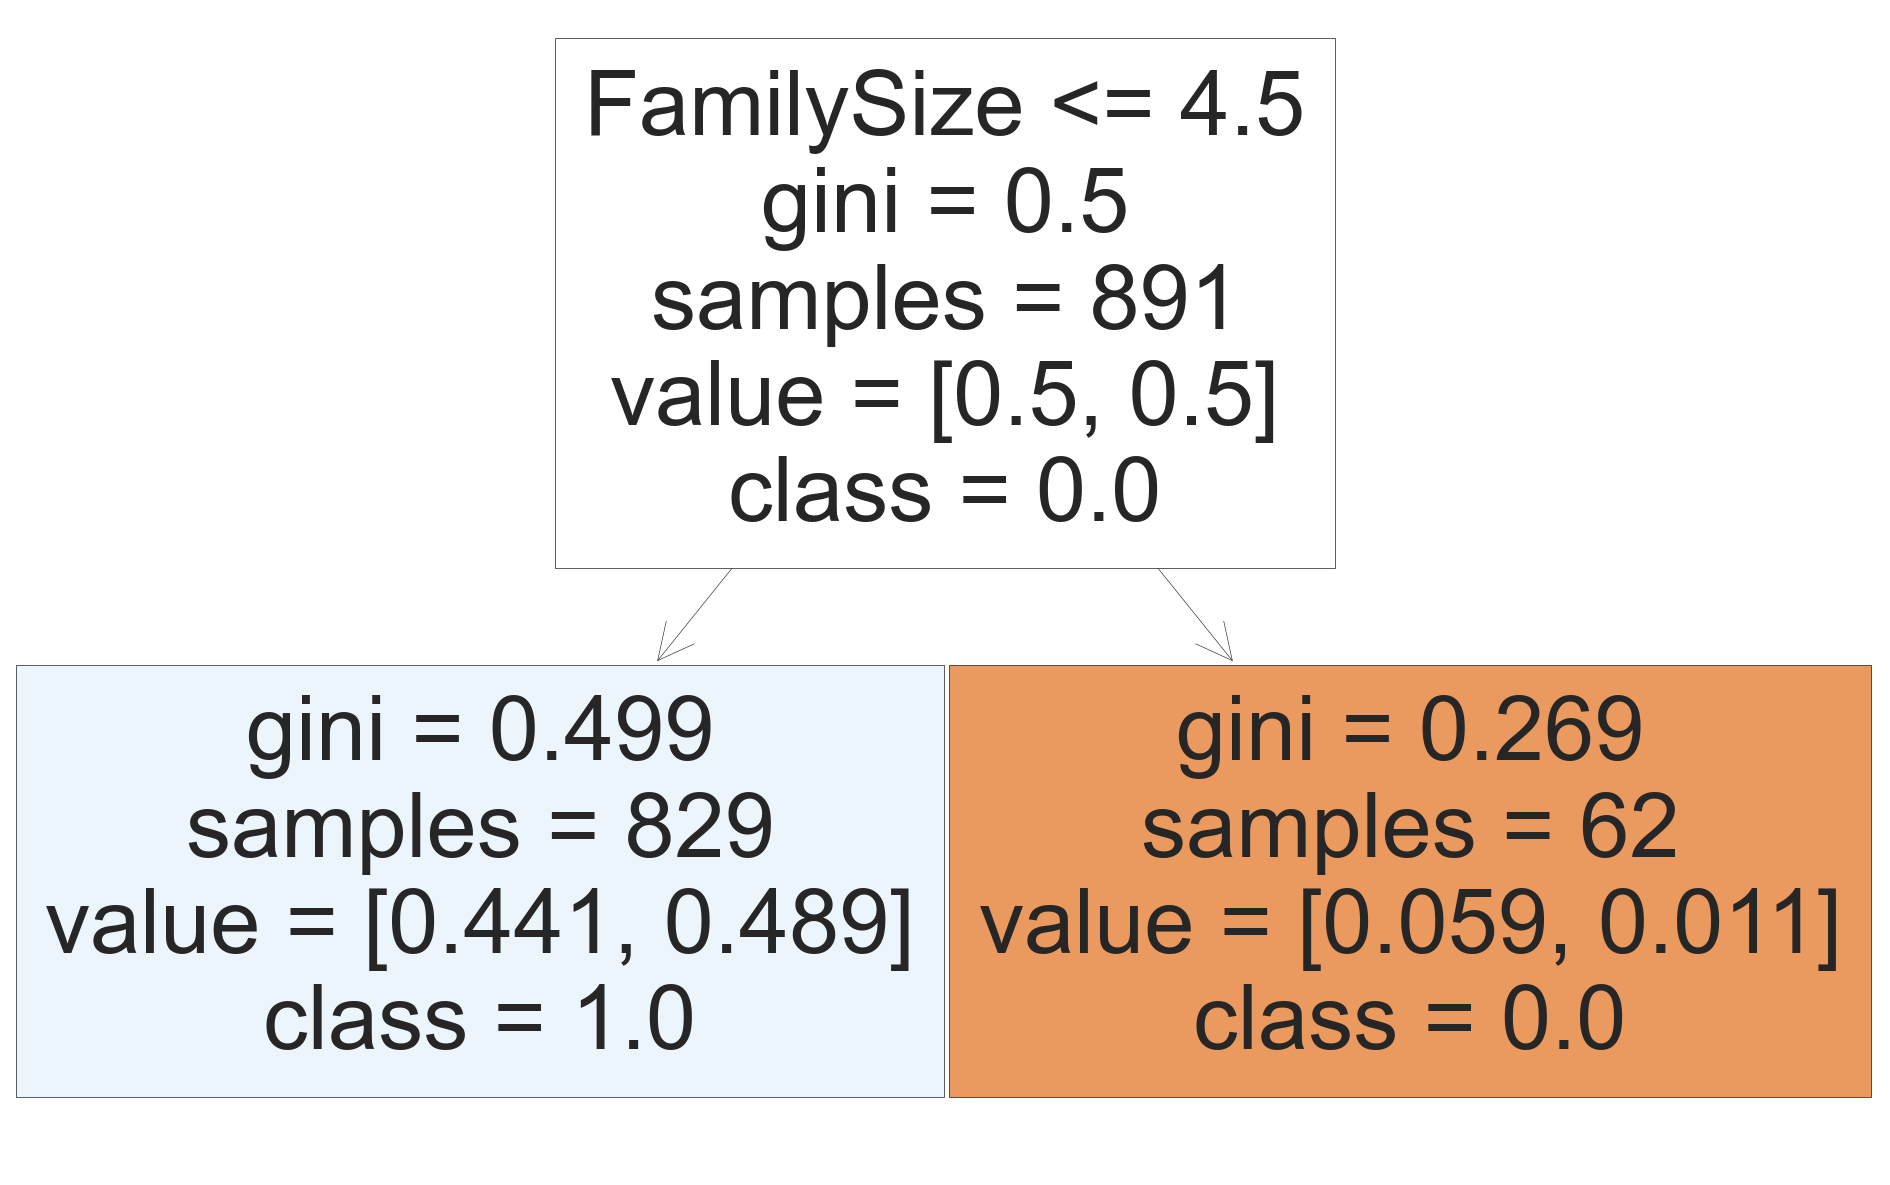

In [40]:
features = list(X.columns)
targets = df_train["Survived"].astype("str") #string e çevir hata alırsın
plt.figure(figsize=(16,10),dpi=150)
plot_tree(ada_model.estimators_[2], filled=True, feature_names=X.columns, class_names=targets.unique());

## Analyzing performance as more weak learners are added.

In [41]:
error_rates = []

for n in range(1,100):
    
    ada_model = AdaBoostClassifier(n_estimators=n)
    ada_model.fit(X_train,y_train)
    preds = ada_model.predict(X_test)
    err = 1 - f1_score(y_test,preds)
    
    error_rates.append(err)

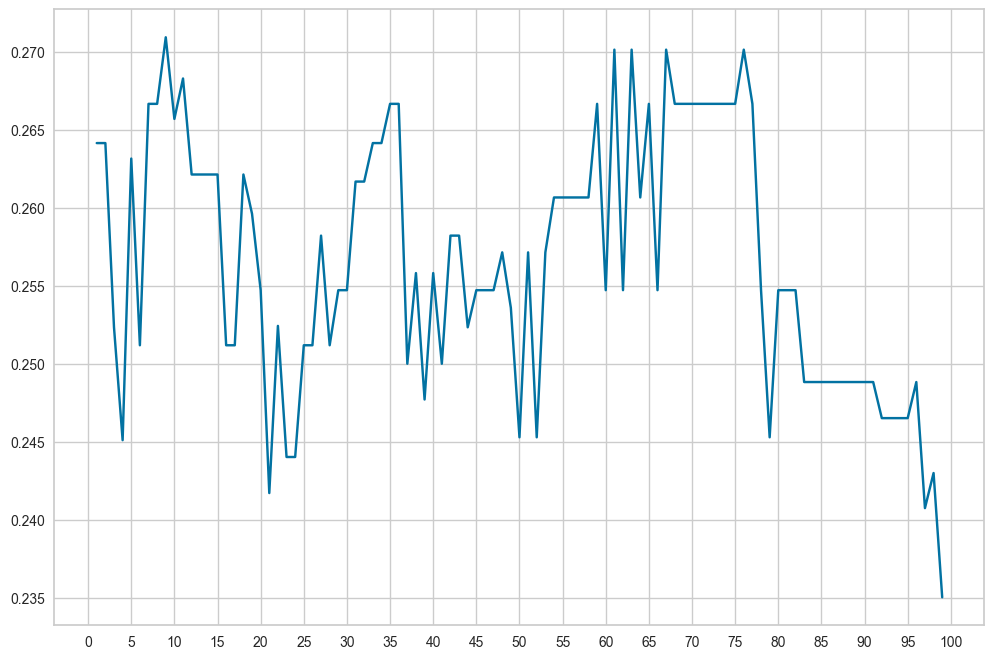

In [42]:
plt.figure(figsize=(12, 8))
plt.plot(range(1,100), error_rates) ## n_estimator den önce grid search içine hangi aralıkta parametre verelim diye bir trick
plt.xticks(range(0, 101, 5));

In [43]:
model = AdaBoostClassifier(random_state=42)

In [44]:
param_grid = {"n_estimators": [20, 50, 100, 200], "learning_rate": [0.01, 0.1, 0.2, 0.5, 1.0]}

In [45]:
ada_grid_model = GridSearchCV(model, param_grid, cv=5, scoring= 'f1')

In [46]:
ada_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0],
                         'n_estimators': [20, 50, 100, 200]},
             scoring='f1')

In [47]:
ada_grid_model.best_params_

{'learning_rate': 1.0, 'n_estimators': 100}

In [48]:
ada_grid_model.best_score_

0.7320000256208246

In [49]:
y_pred = ada_grid_model.predict(X_test)

ada_f1 = f1_score(y_test, y_pred)
ada_recall = recall_score(y_test, y_pred)
ada_auc = roc_auc_score(y_test, y_pred)
eval_metric(ada_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[134  23]
 [ 29  82]]
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84       157
         1.0       0.78      0.74      0.76       111

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268


Train_Set
[[364  28]
 [ 53 178]]
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90       392
         1.0       0.86      0.77      0.81       231

    accuracy                           0.87       623
   macro avg       0.87      0.85      0.86       623
weighted avg       0.87      0.87      0.87       623



## Feature_importances

In [50]:
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
model.feature_importances_

feats = pd.DataFrame(index=X.columns, data= model.feature_importances_, columns=['ada_importance'])
ada_imp_feats = feats.sort_values("ada_importance")
ada_imp_feats

,ada_importance
SibSp,0.00
AgeCategory,0.00
Parch,0.01
Embarked,0.06
FamilySize,0.09
Pclass,0.10
FarePerPerson,0.10
Fare,0.15
Age,0.23
Sex,0.26


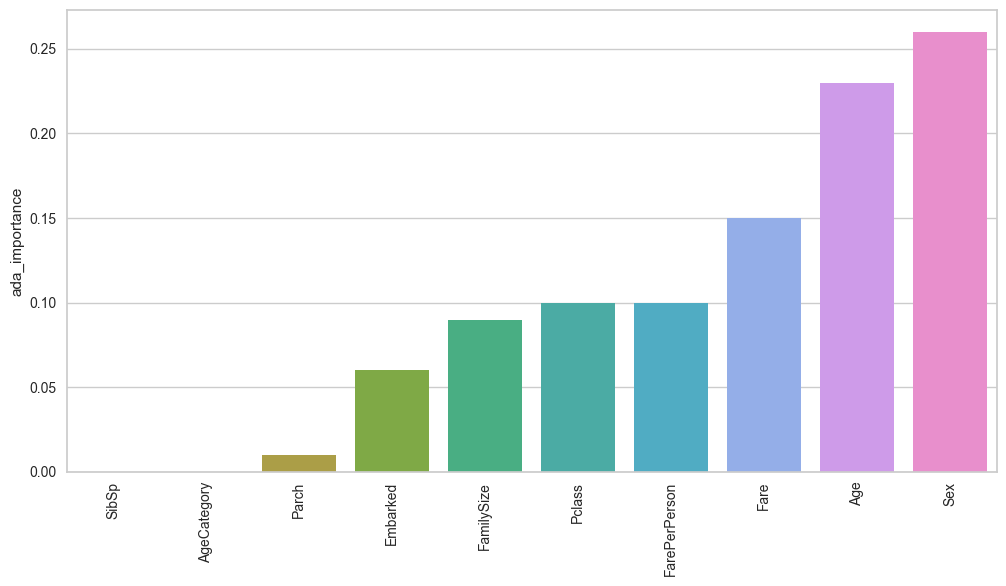

In [51]:
plt.figure(figsize=(12,6))
sns.barplot(data=ada_imp_feats ,x=ada_imp_feats.index, y='ada_importance')

plt.xticks(rotation=90);

## Evaluating ROC Curves and AUC

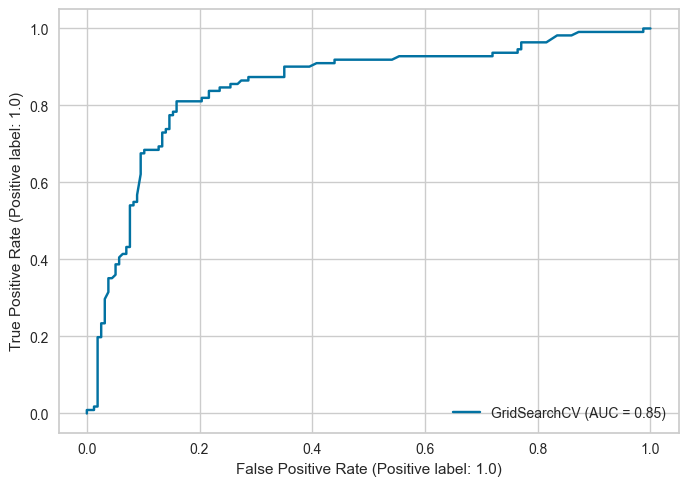

In [52]:
plot_roc_curve(ada_grid_model, X_test, y_test);

# GradientBoosting Classifier

In [53]:
grad_model = GradientBoostingClassifier(random_state=42)

In [54]:
grad_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [55]:
eval_metric(grad_model, X_train, y_train, X_test, y_test)

Test_Set
[[143  14]
 [ 36  75]]
              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85       157
         1.0       0.84      0.68      0.75       111

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.81      0.81       268


Train_Set
[[385   7]
 [ 43 188]]
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       392
         1.0       0.96      0.81      0.88       231

    accuracy                           0.92       623
   macro avg       0.93      0.90      0.91       623
weighted avg       0.92      0.92      0.92       623



## Gridsearch

In [56]:
param_grid = {"n_estimators":[100, 200, 300],
             "subsample":[0.5, 1], "max_features" : [None, 2, 3, 4]} #"learning_rate": [0.001, 0.01, 0.1], 'max_depth':[3,4,5,6]

In [57]:
gb_model = GradientBoostingClassifier(random_state=42)

In [58]:
grid = GridSearchCV(gb_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1, cv=3).fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [59]:
grid.best_params_

{'max_features': 3, 'n_estimators': 200, 'subsample': 0.5}

In [60]:
grid.best_score_

0.7578010874557388

In [61]:
y_pred = grid.predict(X_test)

gb_f1 = f1_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred)

eval_metric(grid, X_train, y_train, X_test, y_test)

Test_Set
[[137  20]
 [ 30  81]]
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.85       157
         1.0       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268


Train_Set
[[382  10]
 [ 38 193]]
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       392
         1.0       0.95      0.84      0.89       231

    accuracy                           0.92       623
   macro avg       0.93      0.90      0.92       623
weighted avg       0.92      0.92      0.92       623



## Feature importances

In [62]:
model = GradientBoostingClassifier(max_features= 3, n_estimators = 100, subsample = 0.5, random_state=42)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['grad_importance'])
grad_imp_feats = feats.sort_values("grad_importance")
grad_imp_feats

,grad_importance
Parch,0.016704
SibSp,0.022779
Embarked,0.029921
AgeCategory,0.035566
FamilySize,0.051950
Pclass,0.076899
Age,0.141967
Fare,0.145018
FarePerPerson,0.160926
Sex,0.318270


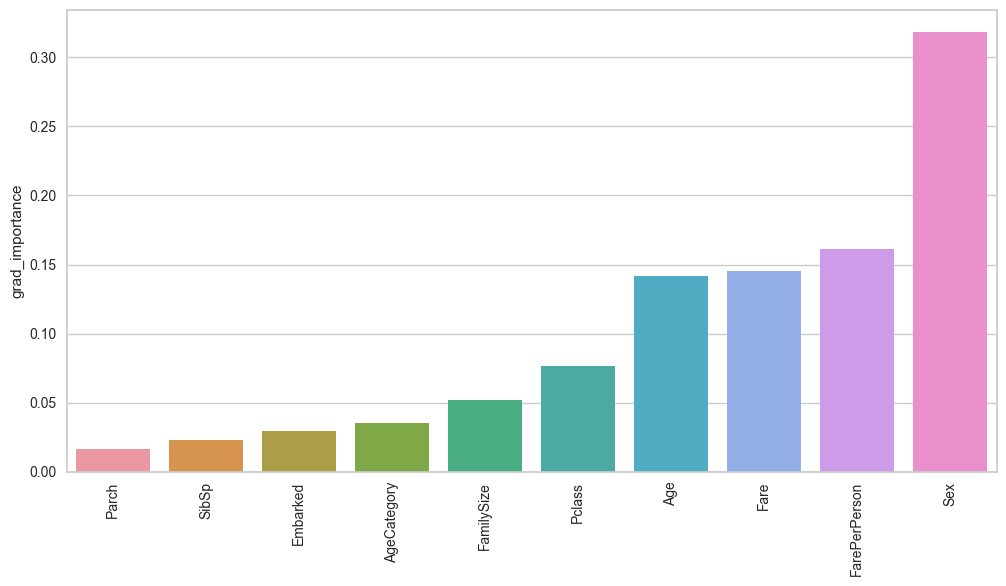

In [63]:
plt.figure(figsize=(12,6))
sns.barplot(data=grad_imp_feats, x=grad_imp_feats.index, y='grad_importance')

plt.xticks(rotation=90);

## Evaluating ROC Curves and AUC

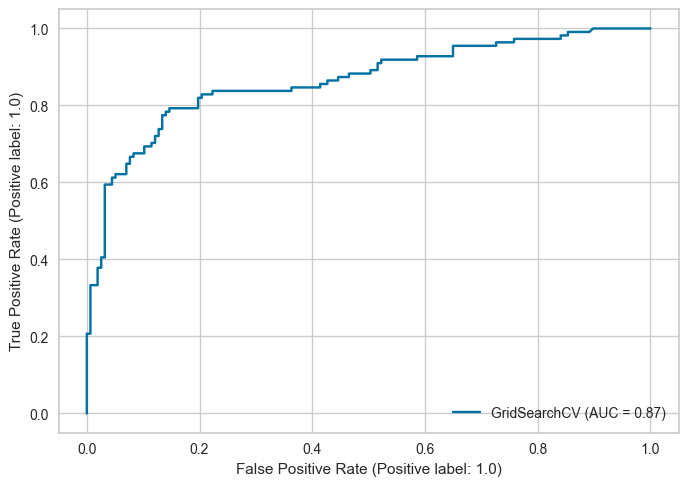

In [64]:
plot_roc_curve(grid, X_test, y_test);

# XGBoosting Classifier

In [65]:
xgb = XGBClassifier(random_state=42).fit(X_train, y_train)

In [66]:
eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[130  27]
 [ 30  81]]
              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       157
         1.0       0.75      0.73      0.74       111

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268


Train_Set
[[390   2]
 [ 13 218]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       392
         1.0       0.99      0.94      0.97       231

    accuracy                           0.98       623
   macro avg       0.98      0.97      0.97       623
weighted avg       0.98      0.98      0.98       623



## Gridsearch

In [67]:
param_grid = {"n_estimators":[50, 100, 200],'max_depth':[3,4,5], "learning_rate": [0.1, 0.2],
             "subsample":[0.5, 0.8, 1], "colsample_bytree":[0.5,0.7, 1]}

In [68]:
xgb_model = XGBClassifier(random_state=42)

In [69]:
#from sklearn.metrics import make_scorer 

In [70]:
#xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = make_scorer(precision_score,  average=None, pos_label=1), verbose=2, n_jobs = -1).fit(X_train, y_train)

In [71]:
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [72]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.2,
 'max_depth': 5,
 'n_estimators': 50,
 'subsample': 0.5}

In [73]:
xgb_grid.best_score_

0.7531563649817128

In [74]:
y_pred = xgb_grid.predict(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[135  22]
 [ 30  81]]
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       157
         1.0       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268


Train_Set
[[381  11]
 [ 42 189]]
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93       392
         1.0       0.94      0.82      0.88       231

    accuracy                           0.91       623
   macro avg       0.92      0.90      0.91       623
weighted avg       0.92      0.91      0.91       623



## Feature importances

In [75]:
model = XGBClassifier(random_state=42, colsample_bytree = 0.5, subsample= 0.8)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance")
xgb_imp_feats

,xgb_importance
SibSp,0.047066
Embarked,0.055623
FarePerPerson,0.061164
Parch,0.061701
Fare,0.061993
AgeCategory,0.068354
FamilySize,0.068403
Age,0.069985
Pclass,0.178369
Sex,0.327342


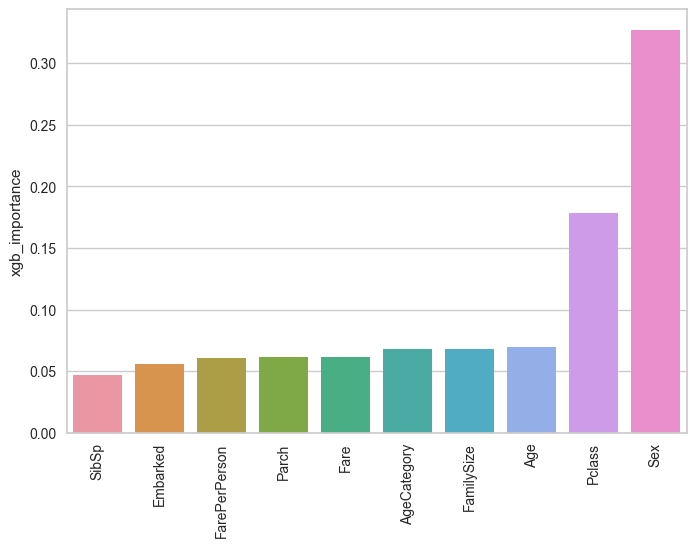

In [76]:
sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index,y='xgb_importance')

plt.xticks(rotation=90);

## Feature importance comparison

In [77]:
pd.concat([ada_imp_feats, grad_imp_feats, xgb_imp_feats], axis=1)

,ada_importance,grad_importance,xgb_importance
SibSp,0.00,0.022779,0.047066
AgeCategory,0.00,0.035566,0.068354
Parch,0.01,0.016704,0.061701
Embarked,0.06,0.029921,0.055623
FamilySize,0.09,0.051950,0.068403
Pclass,0.10,0.076899,0.178369
FarePerPerson,0.10,0.160926,0.061164
Fare,0.15,0.145018,0.061993
Age,0.23,0.141967,0.069985
Sex,0.26,0.318270,0.327342


## Evaluating ROC Curves and AUC

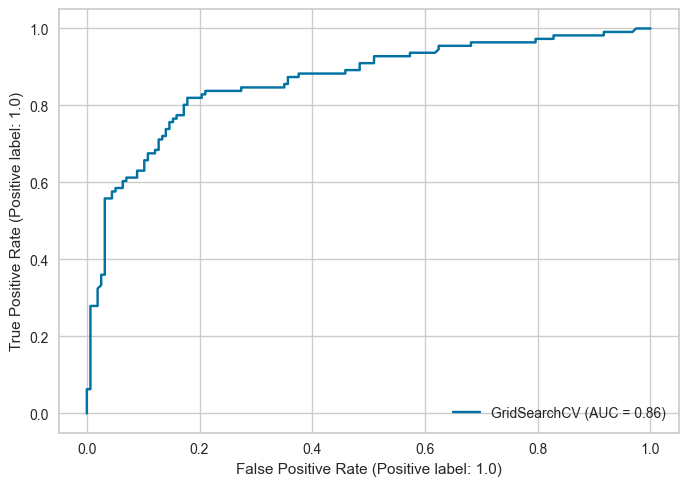

In [78]:
plot_roc_curve(xgb_grid, X_test, y_test);

# Complete Model Training with Full Data

In [79]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X, y)

GradientBoostingClassifier(random_state=42)

In [80]:
df_test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,AgeCategory,FarePerPerson
891,892,NaN,3,0,34.5,0,0,7.8292,1,1,2,7.829200
892,893,NaN,3,1,47.0,1,0,7.0000,2,2,2,3.500000
893,894,NaN,2,0,62.0,0,0,9.6875,1,1,3,9.687500
894,895,NaN,3,0,27.0,0,0,8.6625,2,1,1,8.662500
895,896,NaN,3,1,22.0,1,1,12.2875,2,3,1,4.095833


In [81]:
# input split for test data
X_test = df_test.drop(columns=['PassengerId', 'Survived'], axis=1)

In [82]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,AgeCategory,FarePerPerson
891,3,0,34.5,0,0,7.8292,1,1,2,7.829200
892,3,1,47.0,1,0,7.0000,2,2,2,3.500000
893,2,0,62.0,0,0,9.6875,1,1,3,9.687500
894,3,0,27.0,0,0,8.6625,2,1,1,8.662500
895,3,1,22.0,1,1,12.2875,2,3,1,4.095833


In [83]:
pred = model.predict(X_test)
pred

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

## Test Submission

In [84]:
sub = pd.read_csv('gender_submission.csv')
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [85]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [86]:
sub['Survived'] = pred
sub['Survived'] = sub['Survived'].astype('int')

In [87]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int32
dtypes: int32(1), int64(1)
memory usage: 5.0 KB


In [88]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [90]:
sub.to_csv('submission.csv', index=False)

# CONCLUSION

Veri setinin boyutu küçük olduğundan ve her üç algoritmanın da benzer performans sonuçları elde ettiği göz önünde bulundurulduğunda, seçim yaparken hem performans hem de hesaplama yükü dikkate alınabilir. Bu durumda, Gradient Boosting algoritmasını tercih edebiliriz. Gradient Boosting, genellikle dengeli bir performans-hesaplama yükü sağlar ayrıca en yüksek skorlar gradient boosting de elde edilmiştir confusion matrixteki hatalar da daha azdır.